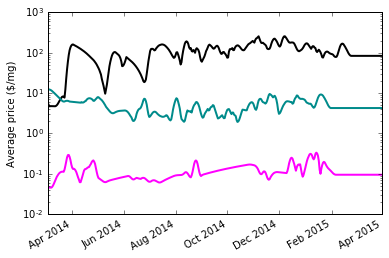

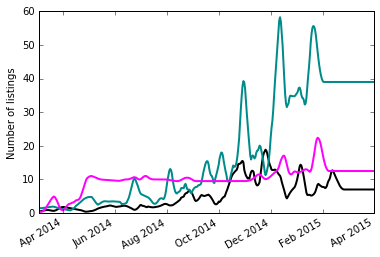

In [20]:
def getFentanylTimeSeries(drugname):
    import numpy as np
    from datetime import datetime
    from numpy import convolve
#     %matplotlib inline
    
    X = np.load('./Fentanyl_FeatureArray_X.npy')
    y = np.load('./Fentanyl_OutputArray_y.npy')
    Xlabel = np.load('Fentanyl_Xlabel.npy')
    dateVector = np.load('./Fentanyl_dateVector.npy')
    dateVector = dateVector.astype(datetime)

    drugLabel = ['Fentanyl HCl','China white','Acetylfentanyl','Butyrfentanyl','Duragesic','Actiq']
    weightlabel = ['Private','Dealer','Distributor']
    
    avgPrice = [] # private, dealer, distributor
    numListings = []
    idx_avgPrice=[[],[],[]]
    idx_numListing=[[],[],[]]
    
#   Group things together
    if drugname==drugLabel[0]: # Fentanyl HCl
        for ii,s in enumerate(Xlabel):
            if ('for fentanyl,' in s) or ('for fentanyl hcl,') in s:
                idx_avgPrice, idx_numListing = idxTree(ii,s,idx_avgPrice,idx_numListing)
        img_price = makeAvgPricePlot(dateVector,X,idx_avgPrice,weightlabel)
        img_listings = makeNumListingsPlot(dateVector,X,idx_numListing,weightlabel)
    elif drugname==drugLabel[1]: # China white
        for ii,s in enumerate(Xlabel):
            if ('china white,' in s):
                idx_avgPrice, idx_numListing = idxTree(ii,s,idx_avgPrice,idx_numListing)
        img_price = makeAvgPricePlot(dateVector,X,idx_avgPrice,weightlabel)
        img_listings = makeNumListingsPlot(dateVector,X,idx_numListing,weightlabel)
    elif drugname==drugLabel[2]: # Acetylfentanyl
        for ii,s in enumerate(Xlabel):
            if ('for acetylfentanyl,' in s):
                idx_avgPrice, idx_numListing = idxTree(ii,s,idx_avgPrice,idx_numListing)
        img_price = makeAvgPricePlot(dateVector,X,idx_avgPrice,weightlabel)
        img_listings = makeNumListingsPlot(dateVector,X,idx_numListing,weightlabel)
    elif drugname==drugLabel[3]: # Butyrfentanyl
        for ii,s in enumerate(Xlabel):
            if ('for butyrfentanyl,' in s) or ('for butyr fentanyl,') in s:
                idx_avgPrice, idx_numListing = idxTree(ii,s,idx_avgPrice,idx_numListing)
        img_price = makeAvgPricePlot(dateVector,X,idx_avgPrice,weightlabel)
        img_listings = makeNumListingsPlot(dateVector,X,idx_numListing,weightlabel)
    elif drugname==drugLabel[4]: # Duragesic
        for ii,s in enumerate(Xlabel):
            if ('for duragesic,' in s):
                idx_avgPrice, idx_numListing = idxTree(ii,s,idx_avgPrice,idx_numListing)
        img_price = makeAvgPricePlot(dateVector,X,idx_avgPrice,weightlabel)
        img_listings = makeNumListingsPlot(dateVector,X,idx_numListing,weightlabel)
    elif drugname==drugLabel[5]: # Actiq
        for ii,s in enumerate(Xlabel):
            if ('actiq,' in s):
                idx_avgPrice, idx_numListing = idxTree(ii,s,idx_avgPrice,idx_numListing)
        img_price = makeAvgPricePlot(dateVector,X,idx_avgPrice,weightlabel)
        img_listings = makeNumListingsPlot(dateVector,X,idx_numListing,weightlabel)    

def idxTree(ii,s, idx_avgPrice, idx_numListing):
    if ('Private cons' in s):
        if ('Avg. price' in s):
            idx_avgPrice[0].append(ii)
        if ('# Listings' in s):
            idx_numListing[0].append(ii)
    if ('Dealer' in s):
        if ('Avg. price' in s):
            idx_avgPrice[1].append(ii)
        if ('# Listings' in s):
            idx_numListing[1].append(ii)
    if ('Distributor' in s):
        if ('Avg. price' in s):
            idx_avgPrice[2].append(ii)
        if ('# Listings' in s):
            idx_numListing[2].append(ii)   
    return idx_avgPrice, idx_numListing


def makeAvgPricePlot(dateVector, X, idx_avgPrice,weightlabel):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import matplotlib.dates as mdates
    import io
   
    linecolors = ['black','darkcyan','magenta']
    fig, ax = plt.subplots(1)
    for jj in range(0,3):
        if idx_avgPrice[jj]:
            avgPrice =  X[:,idx_avgPrice[jj]].mean(axis=1)
            # plot time series
            df_avgPrice=pd.Series(avgPrice, index = dateVector)
            smoothWindowWidth = 5
            avgPriceSmooth=df_avgPrice.rolling(smoothWindowWidth,center=True).mean()
            ax.semilogy(dateVector, avgPriceSmooth/1000, linewidth = 2, label=weightlabel[jj], color=linecolors[jj])
            plt.ylabel('Average price ($/mg)')
            fig.autofmt_xdate()
            ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
    handles, labels = ax.get_legend_handles_labels()
#     ax.legend(handles, labels)
    plt.show()
    img = io.BytesIO()
    fig.savefig(img,bbox_inches='tight')
    img.seek(0)
    return img

def makeNumListingsPlot(dateVector, X, idx_numListing,weightlabel):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import matplotlib.dates as mdates
    import io
   
    linecolors = ['black','darkcyan','magenta']
    fig, ax = plt.subplots(1)
    for jj in range(0,3):
        if idx_numListing[jj]:
            numListing =  X[:,idx_numListing[jj]].mean(axis=1)
            # plot time series
            df_numListing=pd.Series(numListing, index = dateVector)
            smoothWindowWidth = 7
            numListSmooth=df_numListing.rolling(smoothWindowWidth,center=True).mean()
            ax.plot(dateVector, numListSmooth, linewidth = 2, label=weightlabel[jj], color=linecolors[jj])
            plt.ylabel('Number of listings')
            fig.autofmt_xdate()
            ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
    handles, labels = ax.get_legend_handles_labels()
#     ax.legend(handles, labels)
    plt.show()
    img = io.BytesIO()
    fig.savefig(img,bbox_inches='tight')
    img.seek(0)
    return img
                    
if __name__ == '__main__':
    drugname = 'Fentanyl HCl'
    getFentanylTimeSeries(drugname)